The goal of this notebook is to show the basic structure of a neural network and how can we implement it.
The entire functioning of the neural network can be broken down into a lot of mathematical details. For this session, we will focus on programming a neural network and develop a high level understanding of the neural network.

# What is a Neural Network?
* Inspired from the human brain which has 86 billion neurons and 100 trillion interconnections.
* For this demo, we will look at a minimal neural network with 60 neurons and 3700 interconnections

![Image](https://upload.wikimedia.org/wikipedia/commons/4/44/Neuron3.png)

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/800px-Colored_neural_network.svg.png" width="300"/>
</div>

## What does each layer in an artificial NN represent?
#### Input Layer
Fixed based on shape of input data  

#### Hidden Layers
* Consists of learnable weights. This is the part which needs to be customized and designed . 
* There can be multiple hidden layers. First hidden layer extracts features of input
* Second layer extracts features of first layer features and so on

#### Output Layer
* Gives desired output
* It consists of a fully connected layer followed by a non-linear activation function
* Output Layer -> Fixed based on nature of output

## How does it work?
* The network is initialized with some weights
* The network produces an output
* This output is compared against the expected output using loss function
(classification - cross entropy loss vs prediction - MSE)
* The weights are optimised in order to reduce the loss using an algorithm
* The alogorithm used is known as Gradient Descent and backpropogation

Let's visualize this:
http://playground.tensorflow.org/

# What are activation functions? What is the use of non-linear activation functions?
* Inspired from the decision making capability of the brain.
* It "activates" the interconnections between neurons
* Another way to look at it is that without an activation function, a neural network is reduced to a linear function of the form: y = wx + b and which has very limited use when handling complex inputs
* Non-linearity deeply enriches the capability of neural networks to express complex relations between input and output 

# What is loss function?
* In case of classification problem, we can use "Cross Entropy Loss"
* Simply compares the predicted probability with the actual 1 hot vector

# How does the learning happen?
* Via gradient descent. 
* We move the weights in the direction so that the gradient of loss function reduces. This is because we will find minimum loss in the direction where gradient is reducing
(Explain by drawing)

# Time for Demo

In [1]:
# Common libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# We will load the handwrittend digits dataset from sklearn
from sklearn.datasets import load_digits
digits = load_digits()

5


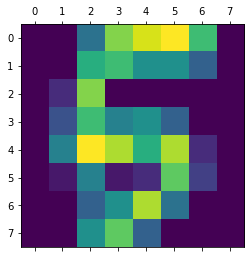

In [3]:
# Lets look at the data and its label for a random sample
import numpy as np
random_idx = np.random.randint(len(digits.data))

#label
print(digits.target[random_idx])

#image
import matplotlib.pyplot as plt 
plt.matshow(digits.images[random_idx]) 
plt.show()

In [4]:
#Convert target variable to 1 hot encoding
from sklearn import preprocessing
le = preprocessing.OneHotEncoder()
y = le.fit_transform(digits.target.reshape(-1,1)).toarray()

In [5]:
#Split the data into training and test data
from sklearn.model_selection import train_test_split
InputData_train, InputData_test, y_train, y_test = train_test_split(digits.data, y, test_size = 0.25, random_state = 22)
print(InputData_train.shape, InputData_test.shape, y_train.shape, y_test.shape)

(1347, 64) (450, 64) (1347, 10) (450, 10)


In [20]:
# Define activation, loss, and their derivatives

#Activation Functions
def sigmoid(x):
    # smoother than step function
    # while learning we change weights/bias
    # sigmoid output will help in determining the direction of change
    return 1 / (1 + np.exp(-x))

def softmax(y):
    return np.exp(y) / np.sum(np.exp(y), axis=0)


def relu(x):
    # rectified linear function
    # gradient is constant for half of the input range
    # never used in output
    # only used for hidden neurons
    return np.maximum(0,x) # ReLU is very simple

#Loss Function for categorical variables
def cross_entropy_loss(y, y_hat):
    L_sum = np.sum(np.multiply(y, np.log(y_hat)))
    m = y.shape[1]
    L = -(1/m) * L_sum
    return L


#Derivatives
def relu_derivative(x):
    return 0.5 * (np.sign(x)+1) # ReLU derivative is either zero or 1.

def sigmoid_derivative(z):
    return z * (1-z)

def softmax_derivative(output, ideal_output):
    return output - ideal_output

def softmax_grad(softmax):
    # Reshape the 1-d softmax to 2-d so that np.dot will do the matrix multiplication
    s = softmax.reshape(-1,1)
    return np.diagflat(s) - np.dot(s, s.T)

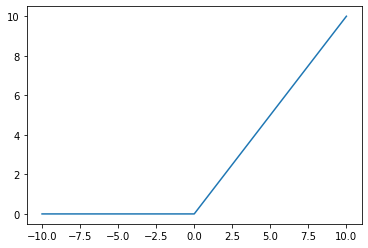

In [23]:
x = [xi for xi in range(-10, 11)]
y = [relu(xi) for xi in x]
plt.plot(x, y)
plt.show()

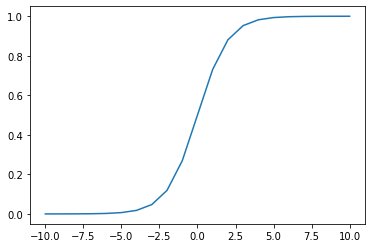

In [26]:
y = [sigmoid(xi) for xi in x]
plt.plot(x, y)
plt.show()

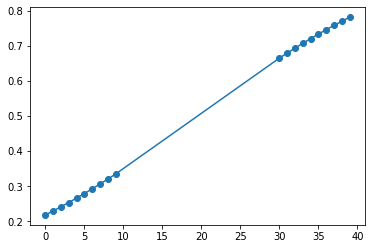

In [29]:
from sklearn.preprocessing import StandardScaler
xe = np.concatenate([np.arange(10), np.arange(30,40)]).reshape(-1,1)
scaler = StandardScaler()
xe_scaled = scaler.fit_transform(xe)
y = [sigmoid(xi) for xi in xe_scaled]
plt.plot(xe, y, marker = 'o')
plt.show()

In [7]:
# Hyperparameters
learning_rate = 0.01

nDigits = 10
inputDim = InputData_train.shape[1]
nHidden = 50
weight_decay = 0.001

W1 = 0.01*np.random.randn(nHidden, inputDim)
b1 = np.zeros((nHidden, 1))
W2 = 0.01*np.random.randn(nDigits, nHidden)
b2 = np.zeros((nDigits, 1))

inputData = InputData_train
y = y_train

In [8]:
inputData.shape, W1.shape

((1347, 64), (50, 64))

In [9]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

Epoch 0 loss:  2.301871315017749
Epoch 100 loss:  1.0108708746648127
Epoch 200 loss:  0.3970792370473779
Epoch 300 loss:  0.2705033064466911
Epoch 400 loss:  0.2219349560591161


<function matplotlib.pyplot.show(*args, **kw)>

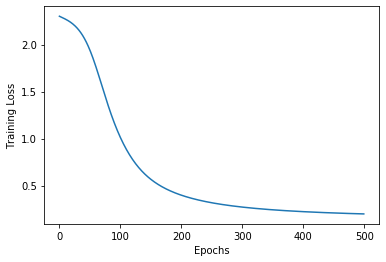

In [10]:
m = len(inputData)
nEpochs = 500
loss_plot = np.zeros(nEpochs)

for i in range(nEpochs):

    # Layer 1A : FC
    logger.debug(f'Layer 1A Fully Connected \nWeights: {W1.shape}, Input Shape: {inputData.T.shape}, Bias Shape: {b1.shape}')
    Z1 = np.matmul(W1,inputData.T) + b1
    
    #Layer 1B: FC : relu activation
    logger.debug(f'Layer 1B Relu: Input Shape {Z1.shape}\n')
    A1 = relu(Z1)
    
    #Layer 2 : FC
    logger.debug(f'Layer 2: Fully Connected \nWeights: {W2.shape}, Input Shape: {A1.shape}, Bias Shape: {b2.shape}\n')
    Z2 = np.matmul(W2,A1) + b2
    
    #Output Layer - Softmax
    logger.debug(f'Layer Softmax Output: \nInput: {Z2.shape}\n')
    A2 = softmax(Z2)

    #Loss calculation
    logger.debug(f'CrossEntropyLoss:\nTraining Labels: {y.T.shape}, Predicted Labels:{A2.shape}\n')
    loss = cross_entropy_loss(y.T, A2)
    loss_plot[i] = loss

    # Gradient from layer 4
    logger.debug(f'Softmax Gradient Inputs:\n Predicted Labels:{A2.shape}, Actual Labels: {y.T.shape}, \n')
    dZ2 = softmax_derivative(A2,y.T)
    
    #Gradients from layer 3
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    #gradients from layer 2
    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    
    #gradients for layer 1
    dW1 = (1./m) * np.matmul(dZ1, inputData)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 -= learning_rate * dW2 + weight_decay * W2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1 + weight_decay * W1
    b1 -= learning_rate * db1
    logger.setLevel(logging.INFO)
    if (i % 100 == 0):
        print("Epoch", i, "loss: ", loss)
    
plt.plot(loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show

In [11]:
Z1 = np.matmul(W1, InputData_test.T) + b1
A1 = relu(Z1)
Z2 = np.matmul(W2, A1) + b2

predictions = np.argmax(Z2, axis=0)
labels = np.argmax(y_test.T, axis=0)

print(f'accuracy score is {accuracy_score(predictions, labels)}')
#print(classification_report(predictions, labels))

accuracy score is 0.9444444444444444


# Visualize the model that we built
https://cs.stanford.edu/people/karpathy/convnetjs/demo/mnist.html


    layer_defs.push({type:'input', out_sx:24, out_sy:24, out_depth:1});
    layer_defs.push({type:'fc', num_neurons:50, activation: 'relu'});
    layer_defs.push({type:'fc', num_neurons:10, activation: 'relu'});
    layer_defs.push({type:'softmax', num_classes:10});

# What kind of fine tuning can be applied?
    No. of epochs
    Batch size
    Learning rate
    Depth (number of layers)
    No. of neurons in each layer
    Dropout (similar to randomly selecting features in random forest)
    Weight Initialization

# What is keras?
Keras is an API which provides high level constructs for building the Neural Networks. Keras is implemented by TensorFlow etc. 

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Flatten

In [13]:
# Explain the Keras framework and pipeline
model = Sequential()
model.add(Dense(50, input_shape = (64, )))
model.add(Activation('relu')) #
model.add(Dense(10))
model.add(Activation('softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [14]:
sgd = optimizers.SGD(lr =learning_rate)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
history = model.fit(InputData_train, y_train, batch_size = 1, epochs = 10, verbose = 1)

Train on 1347 samples
Epoch 1/10
1347/1347 [==============================] - 1s 757us/sample - loss: 1.1260 - acc: 0.6971
Epoch 2/10
1347/1347 [==============================] - 1s 718us/sample - loss: 0.7076 - acc: 0.8248
Epoch 3/10
1347/1347 [==============================] - 1s 712us/sample - loss: 0.5009 - acc: 0.8790
Epoch 4/10
1347/1347 [==============================] - 1s 709us/sample - loss: 0.3767 - acc: 0.9087
Epoch 5/10
1347/1347 [==============================] - 1s 718us/sample - loss: 0.3859 - acc: 0.9050
Epoch 6/10
1347/1347 [==============================] - 1s 716us/sample - loss: 0.4120 - acc: 0.9161
Epoch 7/10
1347/1347 [==============================] - 1s 711us/sample - loss: 0.4022 - acc: 0.9109
Epoch 8/10
1347/1347 [==============================] - 1s 724us/sample - loss: 0.2367 - acc: 0.9406
Epoch 9/10
1347/1347 [==============================] - 1s 716us/sample - loss: 0.2133 - acc: 0.9510
Epoch 10/10
1347/1347 [==============================] - 1s 717us/sam

In [16]:
results = model.evaluate(InputData_test, y_test, verbose = 0)

In [17]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9355556


In [18]:
model.trainable_weights

[<tf.Variable 'dense/kernel:0' shape=(64, 50) dtype=float32>,
 <tf.Variable 'dense/bias:0' shape=(50,) dtype=float32>,
 <tf.Variable 'dense_1/kernel:0' shape=(50, 10) dtype=float32>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32>]

In [19]:
from keras import backend as K

trainable_count = int(
    np.sum([K.count_params(p) for p in set(model.trainable_weights)]))
non_trainable_count = int(
    np.sum([K.count_params(p) for p in set(model.non_trainable_weights)]))

print('Total params: {:,}'.format(trainable_count + non_trainable_count))
print('Trainable params: {:,}'.format(trainable_count))
print('Non-trainable params: {:,}'.format(non_trainable_count))

Total params: 3,760
Trainable params: 3,760
Non-trainable params: 0


Using TensorFlow backend.
